# Browyn Sherman DSTEP Final 

## Problem Statement

I am interested exploring education policy and school choice. Charter schools are one particular school choice option that have been a hot topic nationally. Charter schools are public schools that are independently operated. I am interested in exploring how charter schools compare to traditional public schools in terms of the populations they serve and the educational outcomes they achieve. I chose to focus on the state of Minnesota because they were the first state to authorize a public charter school in 1992. The Minnesota Department of Education collects data from schools and districts throughout the state and makes reports available to the public. Additional information about charter schools in the state of Minnesota is available here: https://education.mn.gov/mde/fam/cs/

In [2]:
# -- Import Useful Tools
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import time 


## Geospatial Data

This dataset lists all current charter schools in the state of MN. According to this source, there should be 181 schools: https://public.education.mn.gov/MdeOrgView/search/tagged/MDEORG_CHARTER_LEA,MARSSOperating


This dataset includes additional information about all schools including latitude and longitude: https://gisdata.mn.gov/dataset/struc-school-program-locs 

This source provides geospatial data for school districts in Minnesota: https://gisdata.mn.gov/dataset/bdry-school-district-boundaries

In [186]:
# -- Load in list of current charter schools 
fname='https://public.education.mn.gov/MdeOrgView/tag/extractContacts/MDEORG_CHARTER_LEA,MARSSOperating?description='
charters=pd.read_csv(fname)

# -- Select useful columns
sub=[4, 16, 17, 18, 19, 20, 21, 28]
cols=charters.columns[sub]
charters=charters[cols]

# -- Remove duplicate rows
charters= charters.drop_duplicates()

# -- Remove // from website column 
split = charters["Web URL"].str.split("/", expand=True)
charters['website']=split[2]

# -- Load in second dataset with coordinates
dpath="/Users/bls/Sherman_DSTEP23_Final/"
fname = dpath + 'school_program_locations.csv'
statewide=pd.read_csv(fname)

# -- Select Charter Schools Only (org type 7)
statewide = statewide[statewide['ORGTYPE'] == 7]

# -- Remove // from website column 
split = statewide["WEB_URL"].str.split("/", expand=True)
statewide['website']=split[2]

# -- Sub Select schools that appear in the charters dataframe
sub= statewide['website'].isin(charters['website'])
statewide = statewide[sub]

# -- Select useful columns
sub=[1, 5, 8, 12, 18, 22, 23, 24, 25, 26]
cols=statewide.columns[sub]
statewide=statewide[cols]

# -- Merge DataFrames 
charters = pd.merge(charters, statewide, left_on='website', right_on='website')

# -- Select useful columns
sub=[0, 2, 8, 11, 12, 13, 16, 17]
cols=charters.columns[sub]
charters=charters[cols]

# -- Rename columns for clarity 
charters.columns = ['school', 'address_1', 'website', 'address', 'grade_range', 'county', 'lat', 'lon']

# -- Remove duplicate rows
charters= charters.drop_duplicates(subset='website')

# -- Display
charters


,school,address_1,website,address,grade_range,county,lat,lon
0,City Academy,NaN,www.cityacademy.org,"958 Jessie St, Saint Paul, MN 55130",9-12,Ramsey,44.969944,-93.076971
3,Bluffview Montessori,NaN,www.bluffviewmontessori.org,"1321 Gilmore Ave, Winona, MN 55987",KG-8,Winona,44.047626,-91.671690
5,"New Heights School, Inc.",NaN,www.newheightsschool.com,"614 W Mulberry St, Stillwater, MN 55082",KG-12,Washington,45.057780,-92.816105
8,Metro Deaf School,NaN,www.mdsmn.org,"1125 Energy Park Dr, Saint Paul, MN 55108",EC-12,Ramsey,44.972822,-93.147522
11,Minnesota New Country School,NaN,www.newcountryschool.com,"210 Main St, Henderson, MN 56044",KG-12,Sibley,44.528928,-93.903436
...,...,...,...,...,...,...,...,...
417,Rollingstone Community School,Ste 2,rollingstonecommunityschool.com,"61 Main St, Rollingstone, MN 55969",KG-5,Winona,44.097982,-91.821818
418,Bultum Academy Charter School,NaN,www.bultumacademy.org,"1555 40th Ave NE, Columbia Heights, MN 55421",PK-8,Anoka,45.042379,-93.236517
419,Marine Village School,NaN,www.marinevillageschool.org,"550 Pine St, Marine On Saint Croix, MN 55047",PK-8,Washington,45.201795,-92.773025
421,Endazhi-Nitaawiging,NaN,www.redlakecharterschool.com,"25065 Highway 1 W, Red Lake, MN 56671",KG-8,Beltrami,47.871070,-95.029424


/var/folders/n4/qn58pcqs793_pw6d4r2zlbjc0000gn/T/ipykernel_24712/1004280882.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


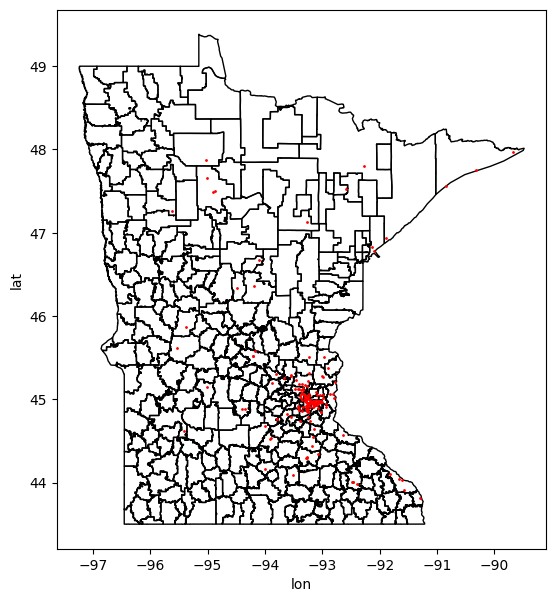

In [187]:
# -- Load in Geospatial Data
dpath="/Users/bls/Sherman_DSTEP23_Final/"
fname1=dpath+'school_district_boundaries.shp'
districts=gpd.read_file(fname1)

# -- convert to decimal degrees
districts = districts.to_crs("epsg:4326")

# -- Plot charters on district map
fig, ax= plt.subplots(figsize=(10,7))
districts.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
charters.plot.scatter('lon', 'lat', ax=ax, color='red', s=1)
fig.show()

/var/folders/n4/qn58pcqs793_pw6d4r2zlbjc0000gn/T/ipykernel_24712/906391475.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


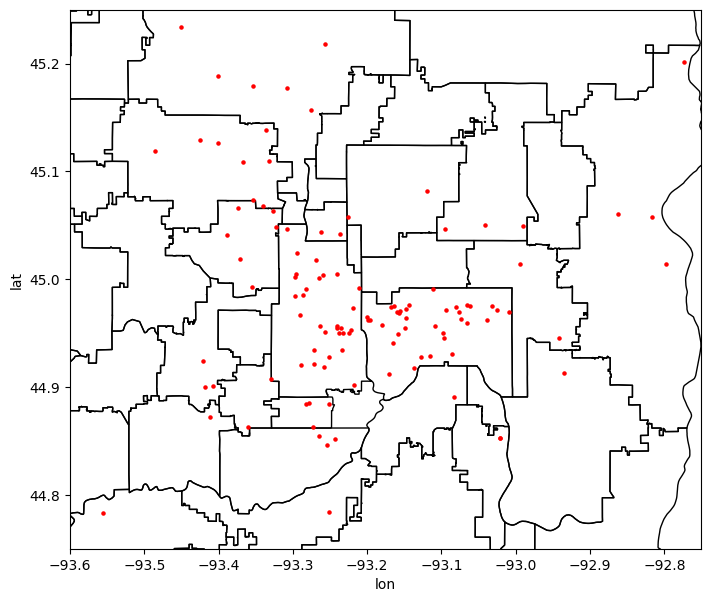

In [188]:
# -- Zoom in on Minneapolis St. Paul Metropolitan Area

fig, ax= plt.subplots(figsize=(10,7))
districts.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
charters.plot.scatter('lon', 'lat', ax=ax, color='red', s=5)
ax.set_xlim([-93.6, -92.75])  
ax.set_ylim([44.75, 45.25])
fig.show()

## Enrollment Data

These sources include student enrollment and demographic data from the 2013-2014 school year through the 2022-2023 school year https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=2. This data will be useful in looking at enrollment trends over time and whether charter schools serve the same populations as traditional public schools.

This data can be broken out by district type and charters are a district type: https://education.mn.gov/MDE/mde074910 This is useful because there have been new school openings and school closures during this timeframe.

In [40]:
# -- Load in Data 
f2014 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086207'
f2015 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086206'
f2016 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086205'
f2017 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086204'
f2018 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086203'
f2019 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE086102'
f2020 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=MDE031850'
f2021 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD034978'
f2022 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD058443'
f2023 = 'https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD070854'

In [48]:
# -- Load in data by school

t0 = time.time()

sy14=pd.read_excel(f2014, sheet_name='School', skiprows=1)
sy15=pd.read_excel(f2015, sheet_name='School', skiprows=1)
sy16=pd.read_excel(f2016, sheet_name='School', skiprows=1)
sy17=pd.read_excel(f2017, sheet_name='School', skiprows=1)
sy18=pd.read_excel(f2018, sheet_name='School', skiprows=1)
sy19=pd.read_excel(f2019, sheet_name='School', skiprows=1)
sy20=pd.read_excel(f2020, sheet_name='School', skiprows=1)
sy21=pd.read_excel(f2021, sheet_name='School', skiprows=1)
sy22=pd.read_excel(f2022, sheet_name='School', skiprows=1)
sy23=pd.read_excel(f2023, sheet_name='School', skiprows=1)

t1 = time.time()
print("route calculated in {0}s".format(t1 - t0))

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1322.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1364.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1363.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$18.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot b

route calculated in 119.88505721092224s


In [200]:
# -- Select Charter Schools Only (district type 7)
sy14_sub=sy14[sy14['District Type'] == 7]
sy15_sub=sy15[sy15['District Type'] == 7]
sy16_sub=sy16[sy16['District Type'] == 7]
sy17_sub=sy17[sy17['District Type'] == 7]
sy18_sub=sy18[sy18['District Type'] == 7]
sy19_sub=sy19[sy19['District Type'] == 7]
sy20_sub=sy20[sy20['District Type'] == 7]
sy21_sub=sy21[sy21['District Type'] == 7]
sy22_sub=sy22[sy22['District Type'] == 7]
sy23_sub=sy23[sy23['District Type'] == 7]

# -- Select data for all grades 
sy14_sub=sy14_sub[sy14_sub['Grade'] == 'All Grades']
sy15_sub=sy15_sub[sy15_sub['Grade'] == 'All Grades']
sy16_sub=sy16_sub[sy16_sub['Grade'] == 'All Grades']
sy17_sub=sy17_sub[sy17_sub['Grade'] == 'All Grades']
sy18_sub=sy18_sub[sy18_sub['Grade'] == 'All Grades']
sy19_sub=sy19_sub[sy19_sub['Grade'] == 'All Grades']
sy20_sub=sy20_sub[sy20_sub['Grade'] == 'All Grades']
sy21_sub=sy21_sub[sy21_sub['Grade'] == 'All Grades']
sy22_sub=sy22_sub[sy22_sub['Grade'] == 'All Grades']
sy23_sub=sy23_sub[sy23_sub['Grade'] == 'All Grades']

# -- Select only useful columns 
sub = [0, 2, 5, 7, 9, 11, 12, 14, 16, 18, 22, 26, 30, 34, 38, 42, 46, 48, 50, 52, 54]
cols1 = sy14_sub.columns[sub]
cols2 = sy15_sub.columns[sub]
cols3 = sy16_sub.columns[sub]
cols4 = sy17_sub.columns[sub]
cols5 = sy18_sub.columns[sub]
cols6 = sy19_sub.columns[sub]
cols7 = sy20_sub.columns[sub]
cols8 = sy21_sub.columns[sub]
cols9 = sy22_sub.columns[sub]
cols10 = sy23_sub.columns[sub]
sy14_sub = sy14_sub[cols1]
sy15_sub = sy15_sub[cols2]
sy16_sub = sy16_sub[cols3]
sy17_sub = sy17_sub[cols4]
sy18_sub = sy18_sub[cols5]
sy19_sub = sy19_sub[cols6]
sy20_sub = sy20_sub[cols7]
sy21_sub = sy21_sub[cols8]
sy22_sub = sy22_sub[cols9]
sy23_sub = sy23_sub[cols10]

# -- group by year and sum
grp14=sy14_sub.groupby("Data Year").sum().reset_index()
grp15=sy15_sub.groupby("Data Year").sum().reset_index()
grp16=sy16_sub.groupby("Data Year").sum().reset_index()
grp17=sy17_sub.groupby("Data Year").sum().reset_index()
grp18=sy18_sub.groupby("Data Year").sum().reset_index()
grp19=sy19_sub.groupby("Data Year").sum().reset_index()
grp20=sy20_sub.groupby("Data Year").sum().reset_index()
grp21=sy21_sub.groupby("Data Year").sum().reset_index()
grp22=sy22_sub.groupby("Data Year").sum().reset_index()
grp23=sy23_sub.groupby("Data Year").sum().reset_index()

# -- combine results into a single dataframe
charter_result = pd.concat([grp14, grp15, grp16, grp17, grp18, grp19, grp20, grp21, grp22, grp23], ignore_index=True)

In [92]:
# -- Load in Data for the State 
MN14=pd.read_excel(f2014, sheet_name='State', skiprows=1)
MN15=pd.read_excel(f2015, sheet_name='State', skiprows=1)
MN16=pd.read_excel(f2016, sheet_name='State', skiprows=1)
MN17=pd.read_excel(f2017, sheet_name='State', skiprows=1)
MN18=pd.read_excel(f2018, sheet_name='State', skiprows=1)
MN19=pd.read_excel(f2019, sheet_name='State', skiprows=1)
MN20=pd.read_excel(f2020, sheet_name='State', skiprows=1)
MN21=pd.read_excel(f2021, sheet_name='State', skiprows=1)
MN22=pd.read_excel(f2022, sheet_name='State', skiprows=1)
MN23=pd.read_excel(f2023, sheet_name='State', skiprows=1)

/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1322.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1364.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: County!$1:$1363.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: State!$1:$18.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/bls/anaconda3/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot b

In [190]:
# -- Select data for all grades 
MN14_sub=MN14[MN14['Grade'] == 'All Grades']
MN15_sub=MN15[MN15['Grade'] == 'All Grades']
MN16_sub=MN16[MN16['Grade'] == 'All Grades']
MN17_sub=MN17[MN17['Grade'] == 'All Grades']
MN18_sub=MN18[MN18['Grade'] == 'All Grades']
MN19_sub=MN19[MN19['Grade'] == 'All Grades']
MN20_sub=MN20[MN20['Grade'] == 'All Grades']
MN21_sub=MN21[MN21['Grade'] == 'All Grades']
MN22_sub=MN22[MN22['Grade'] == 'All Grades']
MN23_sub=MN23[MN23['Grade'] == 'All Grades']

# -- Select useful columns 
sub = [0, 5, 11, 12, 14, 16, 18, 22, 26, 30, 34, 38, 42, 46, 48, 50, 52, 54]
cols1 = MN14_sub.columns[sub]
cols2 = MN15_sub.columns[sub]
cols3 = MN16_sub.columns[sub]
cols4 = MN17_sub.columns[sub]
cols5 = MN18_sub.columns[sub]
cols6 = MN19_sub.columns[sub]
cols7 = MN20_sub.columns[sub]
cols8 = MN21_sub.columns[sub]
cols9 = MN22_sub.columns[sub]
cols10 = MN23_sub.columns[sub]
MN14_sub = MN14_sub[cols1]
MN15_sub = MN15_sub[cols2]
MN16_sub = MN16_sub[cols3]
MN17_sub = MN17_sub[cols4]
MN18_sub = MN18_sub[cols5]
MN19_sub = MN19_sub[cols6]
MN20_sub = MN20_sub[cols7]
MN21_sub = MN21_sub[cols8]
MN22_sub = MN22_sub[cols9]
MN23_sub = MN23_sub[cols10]

# -- group by year and sum
MNgrp14=MN14_sub.groupby("Data Year").sum().reset_index()
MNgrp15=MN15_sub.groupby("Data Year").sum().reset_index()
MNgrp16=MN16_sub.groupby("Data Year").sum().reset_index()
MNgrp17=MN17_sub.groupby("Data Year").sum().reset_index()
MNgrp18=MN18_sub.groupby("Data Year").sum().reset_index()
MNgrp19=MN19_sub.groupby("Data Year").sum().reset_index()
MNgrp20=MN20_sub.groupby("Data Year").sum().reset_index()
MNgrp21=MN21_sub.groupby("Data Year").sum().reset_index()
MNgrp22=MN22_sub.groupby("Data Year").sum().reset_index()
MNgrp23=MN23_sub.groupby("Data Year").sum().reset_index()

# -- combine results into a single dataframe
MN_result = pd.concat([MNgrp14, MNgrp15, MNgrp16, MNgrp17, MNgrp18, MNgrp19, MNgrp20, MNgrp21, MNgrp22, MNgrp23], ignore_index=True)

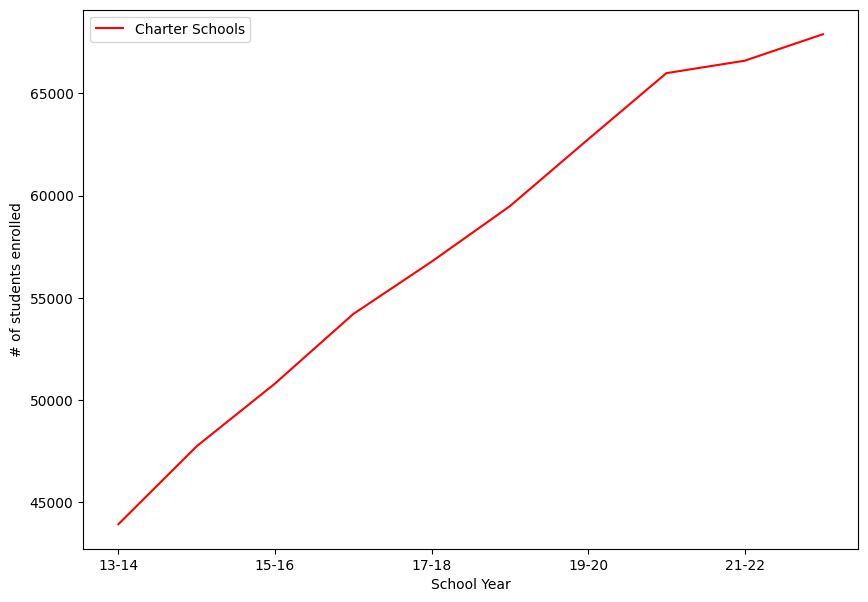

In [177]:
# -- Plot enrollment trends over time for charter schools
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.line(x='Data Year', y='Total Enrollment', label='Charter Schools', color='r', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("# of students enrolled")  
plt.show()

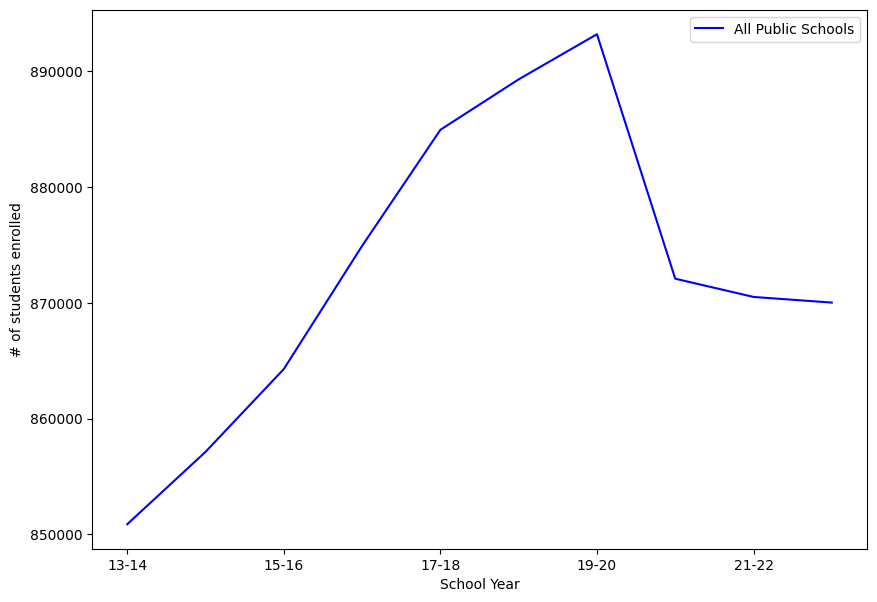

In [178]:
# -- Plot enrollment trends over time for all public schools
fig, ax = plt.subplots(figsize=(10, 7))
MN_result.plot.line(x='Data Year', y='Total Enrollment', label='All Public Schools', color='b', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("# of students enrolled")  
plt.show()  

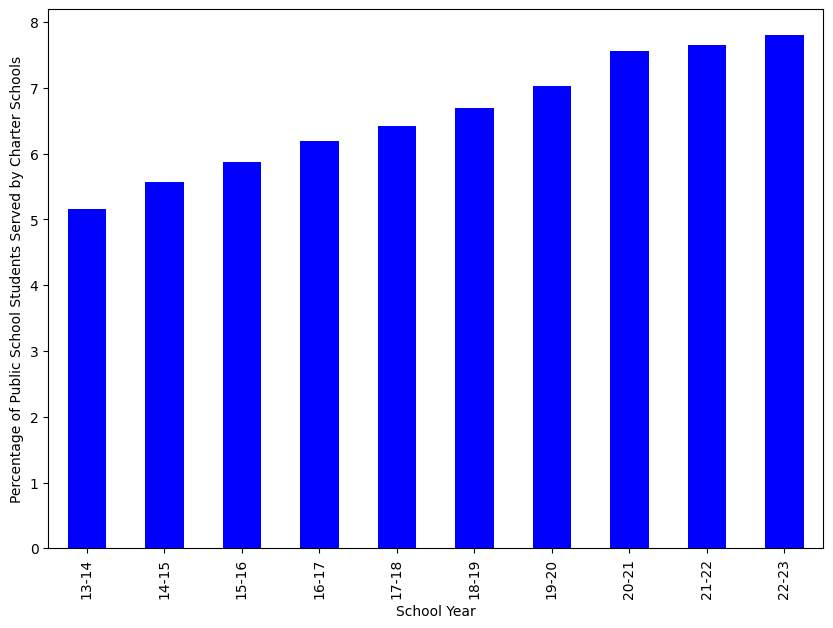

In [179]:
# -- Find Percentage of the Public Student Population Served by Charter Schools Over Time
charter_result['% of all students served']=charter_result['Total Enrollment']/MN_result['Total Enrollment']* 100

# -- Plot Result
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.bar(x='Data Year', y='% of all students served', legend=None, color='b', ax=ax)
plt.xlabel("School Year")  
plt.ylabel("Percentage of Public School Students Served by Charter Schools")  
plt.show()

In [163]:
# -- Calculate % of white students served versus students of color
charter_result['% of students who are white']=charter_result['Total White Count']/charter_result['Total Enrollment']* 100
charter_result ['% of students who are poc']=charter_result['Total Students of Color or American Indian Count']/charter_result['Total Enrollment']* 100
MN_result['% of all students who are white']=MN_result['Total White Count']/MN_result['Total Enrollment']*100
MN_result ['% of all students who are poc']=MN_result['Total Students of Color or American Indian Count']/MN_result['Total Enrollment']*100
charter_result['% of all white students served by charters']= charter_result['Total White Count']/MN_result['Total White Count']*100
charter_result['% of all poc students served by charters'] = charter_result['Total Students of Color or American Indian Count']/MN_result['Total Students of Color or American Indian Count']*100

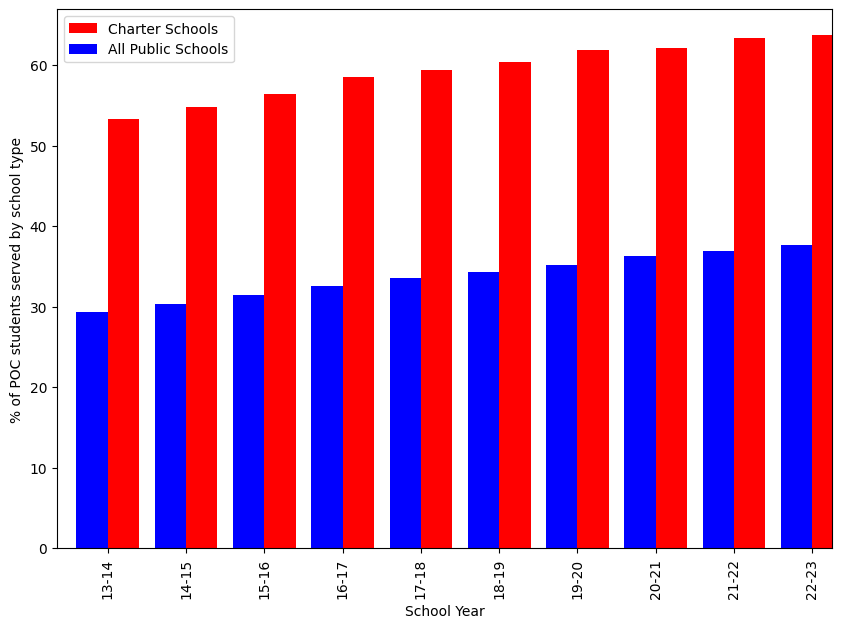

In [185]:
# -- Plot enrollment trends for students of color over time
fig, ax = plt.subplots(figsize=(10, 7))
charter_result.plot.bar(x='Data Year', y='% of students who are poc', label='Charter Schools', position=0, color='r', ax=ax, width=0.4)
MN_result.plot.bar(x='Data Year', y='% of all students who are poc', label='All Public Schools', position=1, color='b', ax=ax, width=0.4)
plt.xlabel("School Year")  
plt.ylabel("% of POC students served by school type")  
plt.show()



In [170]:
# -- Calculate averages from '14 through '23
charter_white=charter_result['% of charter studenst who are white'].mean()
charter_poc=charter_result ['% of charter students who are poc'].mean()
MN_white=MN_result['% of all students who are white'].mean()
MN_poc=MN_result ['% of all students who are poc'].mean()
charterpct_white=charter_result['% of all white students served by charters'].mean()
charterpct_poc=charter_result['% of all poc students served by charters'].mean()

# -- Print results
print('Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white public school students in the state of Minnesota was', round(MN_white),'% and the average percentage of students of color was', round(MN_poc),'%.') 
print('')   
print('Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white charter school students in the state of Minnesota was', round(charter_white),'% and the average percentage of students of color was', round(charter_poc),'%.') 
print('') 
print('Between the 2013-2014 school year and the 2022-2023 school year, charter schools served', round(charterpct_white), '% of all white public school students in the state of Minnesota on average, and',round(charterpct_poc), '% of all public school students of color.')

Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white public school students in the state of Minnesota was 66 % and the average percentage of students of color was 34 %.

Between the 2013-2014 school year and the 2022-2023 school year, the average percentage of white charter school students in the state of Minnesota was 41 % and the average percentage of students of color was 59 %.

Between the 2013-2014 school year and the 2022-2023 school year, charter schools served 4 % of all white public school students in the state of Minnesota on average, and 12 % of all public school students of color.


In [250]:
# -- Look at range of the percentage of POC students served by charter schools
# -- There will be more than 181 charter schools because schools have opened and closed over this timeframe

# -- combine subsets into a single dataframe
charter_schools = pd.concat([sy14_sub, sy15_sub, sy16_sub, sy17_sub, sy18_sub, sy19_sub, sy20_sub, sy21_sub, sy22_sub, sy23_sub])

# -- convert school names to all lower case
charter_schools['School Name'] = charter_schools['School Name'].str.lower()

# -- group by school and sum
cgrp=charter_schools.groupby("School Name").sum(numeric_only=True).reset_index()

# -- Calculate % of white students served versus students of color
cgrp['% of students who are white']=round(cgrp['Total White Count']/cgrp['Total Enrollment']* 100)
cgrp ['% of students who are poc']=round(cgrp['Total Students of Color or American Indian Count']/cgrp['Total Enrollment']* 100)

# -- Sort values from lowest to highest
charter_sorted= cgrp.sort_values("% of students who are poc")
charter_sorted

,School Name,Total Enrollment,Total Female Count,Total Male Count,Total American Indian or Alaska Native Count,Total Asian Count,Total Native Hawaiian or Pacific Islander Count,Total Hispanic or Latino Count,Total Black or African American Count,Total White Count,...,Total Students Experiencing Homelessness Count,Total Students Eligible for Free or Reduced Priced Meals Count,Total English Learner Identified Count,Total Students American Indian (State) Count,Total Students Not American Indian (State) Count,Total American Indian Count,Total Other Indigenous Peoples Count,Two or More Races Female Count,% of students who are white,% of students who are poc
211,milroy area charter school,206.0,116.0,90.0,0.0,0.0,0.0,0.0,0.0,206.0,...,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
363,starland elementary,78.0,35.0,43.0,0.0,0.0,0.0,0.0,0.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
166,la crescent montessori and stem academy,42.0,20.0,22.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
238,nasha shkola charter school,1218.0,591.0,627.0,0.0,0.0,0.0,0.0,16.0,1192.0,...,0.0,328.0,257.0,0.0,129.0,0.0,0.0,0.0,98.0,2.0
200,marine village school,29.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,97.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,skyline math and science academy,1095.0,549.0,546.0,0.0,0.0,0.0,0.0,1095.0,0.0,...,0.0,0.0,454.0,0.0,233.0,0.0,0.0,0.0,0.0,100.0
203,metro college prep,882.0,391.0,491.0,0.0,0.0,0.0,1.0,879.0,2.0,...,0.0,0.0,0.0,0.0,437.0,0.0,0.0,0.0,0.0,100.0
205,metro schools charter,2179.0,1101.0,1078.0,0.0,21.0,0.0,3.0,2154.0,1.0,...,2.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
207,metro tech academy elementary,105.0,49.0,56.0,0.0,0.0,0.0,0.0,105.0,0.0,...,0.0,0.0,13.0,0.0,81.0,0.0,0.0,0.0,0.0,100.0


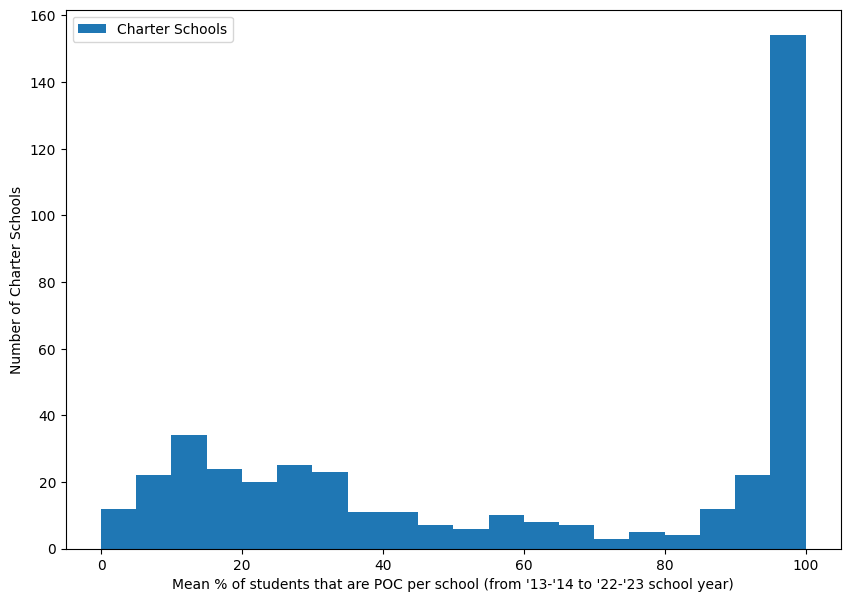

In [246]:
# -- Plot histogram
fig, ax = plt.subplots(figsize=(10, 7))
charter_sorted.reset_index().plot.hist(x='index', y='% of students who are poc', label='Charter Schools', ax=ax, bins=20)
plt.xlabel("Mean % of students that are POC per school (from '13-'14 to '22-'23 school year)")
plt.ylabel("Number of Charter Schools")
plt.show()

In [247]:
sum_zeros = charter_sorted[charter_sorted['% of students who are poc'] == 0.0]['% of students who are poc'].count()
sum_hundreds = charter_sorted[charter_sorted['% of students who are poc'] == 100.0]['% of students who are poc'].count()

print(f'There have been {sum_zeros} Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 0% students of color on average.')
print('')
print(f'There have been {sum_hundreds} Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 100% students of color on average.')

There have been 3 Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 0% students of color on average.

There have been 86 Charter schools that have operated between the 2013-2014 school year and the 2022-2023 school year that have served 100% students of color on average.


# Testing Data
This source has data on standardized testing results https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=1 and this source provides context: https://education.mn.gov/MDE/dse/test/mn/. This data may be useful in comparing academic outcomes between charters and traditional public schools.



In [ ]:
# -- Load in Data by School 
math_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082118'
reading_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082119'
science_file='https://education.mn.gov/mdeprod/idcplg?IdcService=GET_FILE&RevisionSelectionMethod=latestReleased&Rendition=primary&dDocName=PROD082117'

In [ ]:
math= pd.read_excel(math_file, sheet_name='School')
reading=pd.read_excel(reading_file, sheet_name='School')
science=pd.read_excel(science_file, sheet_name='School')
math

In [ ]:
# -- Load in Data for the State 
MN_math= pd.read_excel(math_file, sheet_name='State')
MN_reading=pd.read_excel(reading_file, sheet_name='State')
MN_science=pd.read_excel(science_file, sheet_name='State')
MN_math